In [27]:
import numpy as np
import os
import timeit
import 

from HMM_george import unsupervised_HMM
# from HMM_project import unsupervised_HMM
# from HMM_sharon import unsupervised_HMM
from HMM_helper_processed import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

from pos_visualize import pos_vis

In [2]:
shakespeare = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
# poem3 = open(os.path.join(os.getcwd(), 'data/poem3.txt')).read()


obs, obs_map = parse_observations(shakespeare)

In [3]:
print(len(obs))
# print(obs[0])

print(len(obs_map))
# print(obs_map)

154
3236


In [4]:
num_hmm_hidden_states = [2**0, 2**1, 2**2, 2**3, 2**4, 2**5]
num_iters = 10

In [5]:
arrangement_of_words = [9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9]

def train(observations, observation_map, num_hidden_states, num_iterations, arrangement_of_words, num_words = 115):
    start_time = timeit.default_timer()
    hmm = unsupervised_HMM(observations, num_hidden_states, num_iterations)
    stop_time = timeit.default_timer()
    print('Elpased time: ', stop_time - start_time)
    print('Sample Poem:\n====================')
    sentence = sample_sentence(hmm, observation_map, n_words=num_words)
    sentence_split_by_spaces = sentence.split()
    
    count = 0
    total_num_words_printed = 0
    for num_words in arrangement_of_words:
        if(count == 0):
            sent = " ".join(sentence_split_by_spaces[0:num_words])
            
        elif count > 0:
            sent = " ".join(sentence_split_by_spaces[total_num_words_printed: total_num_words_printed + num_words])
            
        print(sent)
        total_num_words_printed += num_words
        count += 1
        
    return hmm

In [6]:
# hyphens should be removed as words
# punctuation can't directly follow other punctuation
# If there is a single i, it needs to be capitalized
# remake carrots into apostrophes

In [8]:
# num_hmm_hidden_states = [2**2, 2**3, 2**4, 2**5]
# num_iters = 1000

# for hidden_state in num_hmm_hidden_states:
#     print('On HMM number: ', hidden_state)
#     train(obs, obs_map, hidden_state, num_iters, arrangement_of_words, 115)
#     print('')


print('Training HMM 8:')
hmm_sabera_8 = train(obs, obs_map, 8, 1000, arrangement_of_words, 115)


Training HMM 8:
On iteration number:  0
On iteration number:  100
On iteration number:  200
On iteration number:  300
On iteration number:  400
On iteration number:  500
On iteration number:  600
On iteration number:  700
On iteration number:  800
On iteration number:  900
Elpased time:  833.3075559880001
Sample Poem:
On my forced thy with the thee know fair
counted grace be my my to stol^n i
of have can witness love to doth doth
they show not in of thy not thee
my too count stand give should beyond with
answer your i with not are in then
it missed then my i perjured of upon
thy remembered on o nurse outlive make from
says to flatter to are to in the
bright i not ? compound grace from some
pay to with weary hang complexion i thee
policy that consecrate unused distilled looks your are
vow anew she me grace to of simple be
be my much of frailer thy time^s thee from...


In [9]:
import pickle

# Save trained HMM models
with open(r"hmm8_1000_epochs.pickle", "wb") as output_file:
    pickle.dump(hmm_sabera_8, output_file)

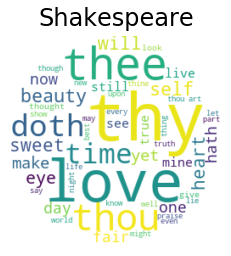

In [10]:
wordcloud = text_to_wordcloud(shakespeare, title='Shakespeare')

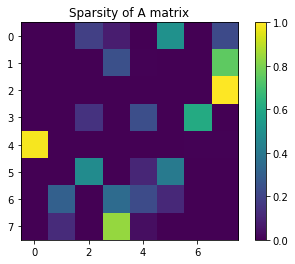

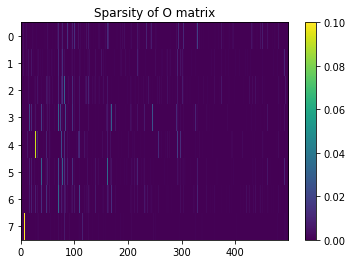

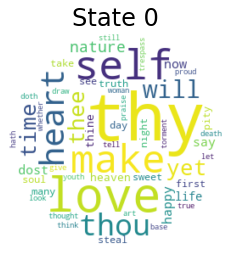

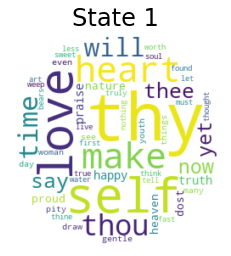

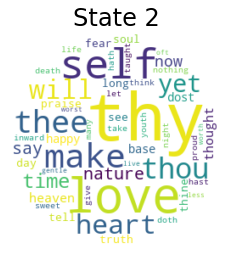

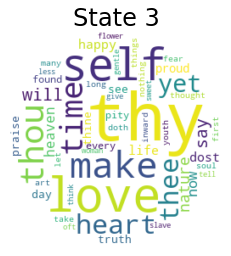

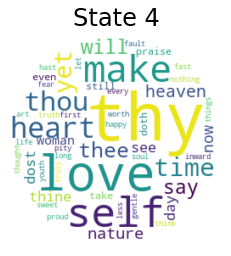

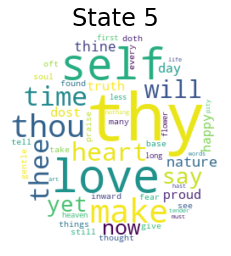

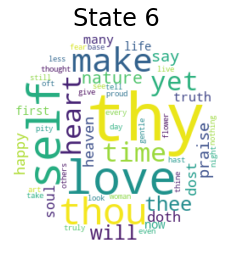

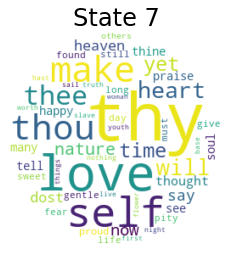

In [36]:
visualize_sparsities(hmm_sabera_8, O_max_cols=500)
print('')
wordclouds_8 = states_to_wordclouds(hmm_sabera_8, obs_map)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/saberatalukder/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


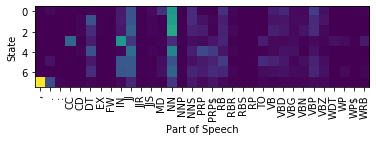

In [28]:
pos_vis(hmm_sabera_8, obs_map)

In [13]:
A_matrix = np.asarray(hmm_sabera_8.A)
O_matrix = np.asarray(hmm_sabera_8.O)

In [14]:
A_matrix.shape
O_matrix.shape

(8, 3236)

In [15]:
ordered_columns_for_O = list(sorted(obs_map.keys(), key=lambda k : obs_map[k]))

In [16]:
ordered_columns_for_O

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 ',',
 'that',
 'thereby',
 'beauty^s',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'bear',
 'memory',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feed^st',
 'thy',
 'light^s',
 'flame',
 'with',
 'self-substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'self',
 'foe',
 'sweet',
 'too',
 'cruel',
 'art',
 'now',
 'world^s',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'gaudy',
 'spring',
 'within',
 'bud',
 'buriest',
 'content',
 'churl',
 'mak^st',
 'waste',
 'in',
 'niggarding',
 'pity',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'eat',
 'due',
 'grave',
 'thee',
 '.',
 'when',
 'forty',
 'winters',
 'shall',
 'besiege',
 'brow',
 'dig',
 'deep',
 'trenches',
 'field',
 'youth^s',
 'proud',
 'livery',
 'so',
 'gazed',
 'on',
 'will',
 'tattered',


In [17]:
sorted_O_matrix = np.argsort(O_matrix, axis = 1)

In [18]:
O_matrix

array([[6.30058301e-292, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [2.56242357e-119, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [1.98052489e-003, 0.00000000e+000, 0.00000000e+000, ...,
        4.78741820e-004, 0.00000000e+000, 0.00000000e+000],
       ...,
       [1.12719327e-002, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.26046989e-025, 0.00000000e+000],
       [5.37244408e-003, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 3.79027041e-004],
       [1.83266663e-132, 1.42941621e-003, 0.00000000e+000, ...,
        0.00000000e+000, 2.85883242e-004, 0.00000000e+000]])

In [19]:
high_indicies = sorted_O_matrix[:, -10:]

In [20]:
ordered_columns_for_O

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 ',',
 'that',
 'thereby',
 'beauty^s',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'bear',
 'memory',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feed^st',
 'thy',
 'light^s',
 'flame',
 'with',
 'self-substantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'self',
 'foe',
 'sweet',
 'too',
 'cruel',
 'art',
 'now',
 'world^s',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'gaudy',
 'spring',
 'within',
 'bud',
 'buriest',
 'content',
 'churl',
 'mak^st',
 'waste',
 'in',
 'niggarding',
 'pity',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'eat',
 'due',
 'grave',
 'thee',
 '.',
 'when',
 'forty',
 'winters',
 'shall',
 'besiege',
 'brow',
 'dig',
 'deep',
 'trenches',
 'field',
 'youth^s',
 'proud',
 'livery',
 'so',
 'gazed',
 'on',
 'will',
 'tattered',


In [21]:
high_indicies

array([[ 161,   99,   86,   31,   33,  156,  257,  329,   52,  620],
       [ 291,   98,   69,  522,  502,   77,  156,  824,  464,   16],
       [  75,  584,  125,   69,   96,   77,  464,  502,   81,   16],
       [  83,  136,  245,  168,   69,   14,   29,    7,  102,   57],
       [ 502,  584,   75,  134,   42,  149,   16,   22,   27,  494],
       [ 212,   69,  102,   35,   77,   38,  494,  136,  161,   29],
       [  38,   47,  464,   29,  109,   16,    7,   69,   35,  136],
       [ 156,   16, 1444,   81,  114,   29,  175,  136,   82,    6]])

In [34]:
for idx, row in enumerate(high_indicies):
    print('State ', idx)
    for word_idx in reversed(row):
        print(ordered_columns_for_O[word_idx], end =" ")
    print('')
    print('')

State  0
have art do eye is eyes own shall will not 

State  1
the love heart is be me away in on no 

State  2
the thee me love be so in more you this 

State  3
and of that to but in for which my when 

State  4
i thou his the it a mine this you me 

State  5
to not my i with be thy of in doth 

State  6
my thy in that the all to love self with 

State  7
, . my ? to ; thee ! the is 

